In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re
import json

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [285]:
train = pd.read_csv("./res/titanic/train.csv")
test = pd.read_csv("./res/titanic/test.csv")

# 탐색적 분석(EDA : Exploratory Data Analysis)

In [286]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [288]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [289]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [290]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [291]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [292]:
# 성별에 따른 생존율
(train.groupby("Sex")["Survived"].mean()) # <class 'pandas.core.series.Series'>
train.groupby("Sex")[["Survived"]].mean() # <class 'pandas.core.frame.DataFrame'> 

,Survived
Sex,
female,0.742038
male,0.188908


In [293]:
train.pivot_table(index="Sex", values="Survived", aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [294]:
train.pivot_table(index="Sex")

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [295]:
train.groupby("Sex")[["Survived"]].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [296]:
# 성별, 선실등급별 생존률 출력
train.pivot_table("Survived", ["Sex", "Pclass"]) # 처리하는 데이터, index

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [297]:
# 첫번째 시도 여성이면 생존자다
test["Survived"] = (test.Sex == "female") & (test.Age > 0) & (test.Embarked)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True


In [298]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [299]:
submission = test[["PassengerId", "Survived"]].copy()
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null bool
dtypes: bool(1), int64(1)
memory usage: 3.8 KB


In [300]:
submission["Survived"] = submission["Survived"].astype(int)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [301]:
# submission.to_csv("./res/titanic/submission.csv") # index도 한 열로 들어감
submission.to_csv("./res/titanic/submission.csv", index=False)

In [302]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [303]:
import missingno as msno

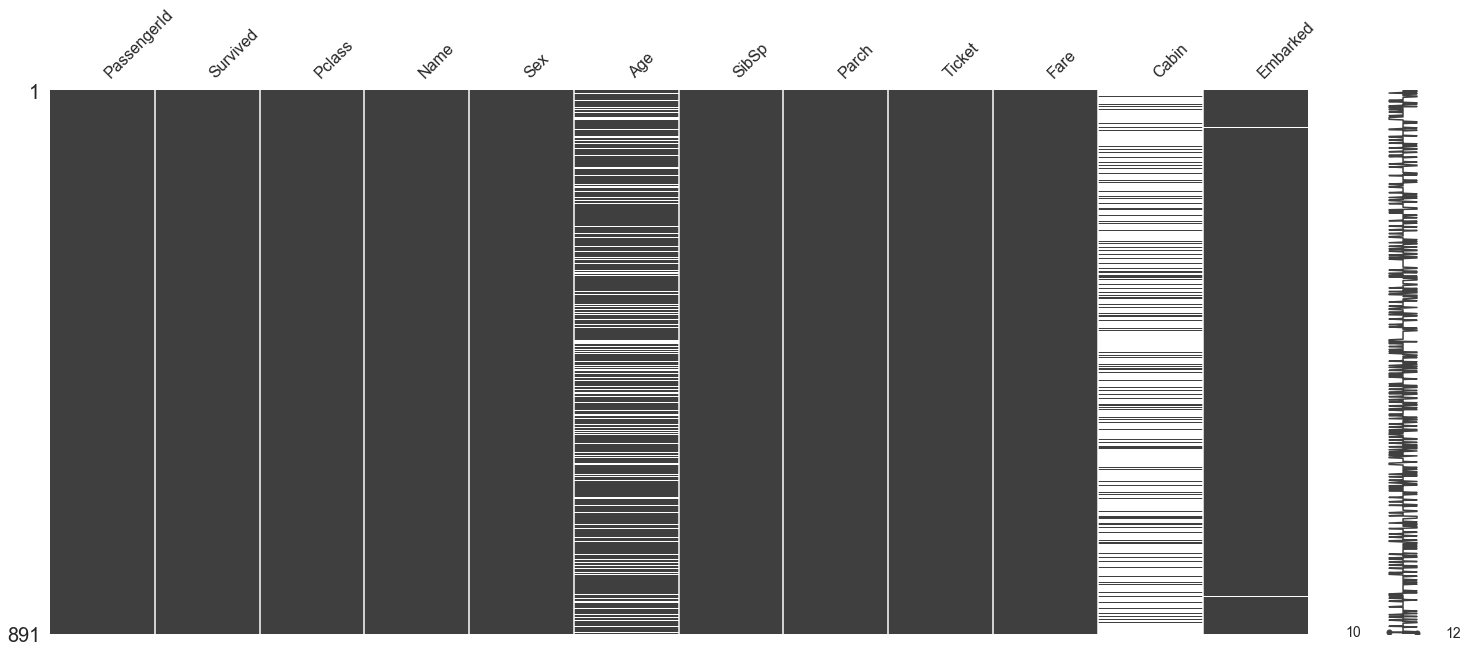

In [304]:
msno.matrix(train) # 여백 = 결측값

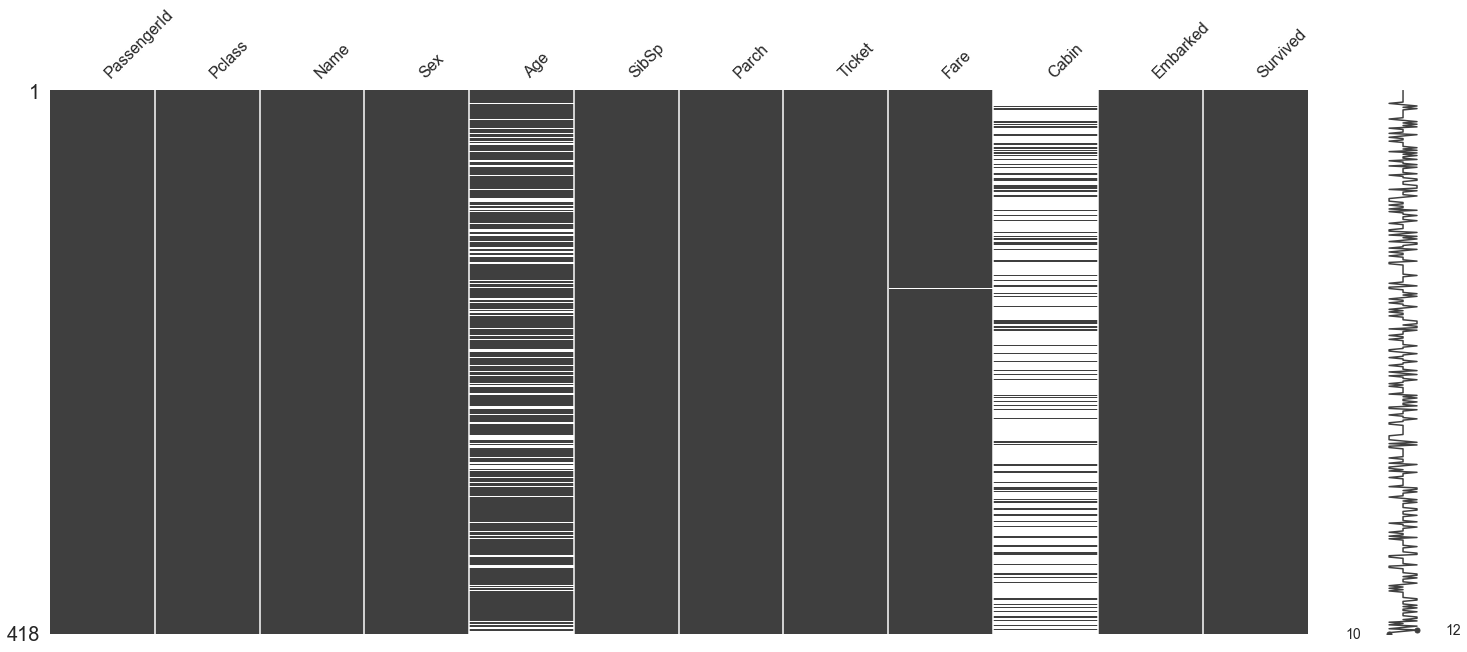

In [305]:
msno.matrix(test) # 테스트 데이터는 Age, Cabin에 결측치가 많이 존재

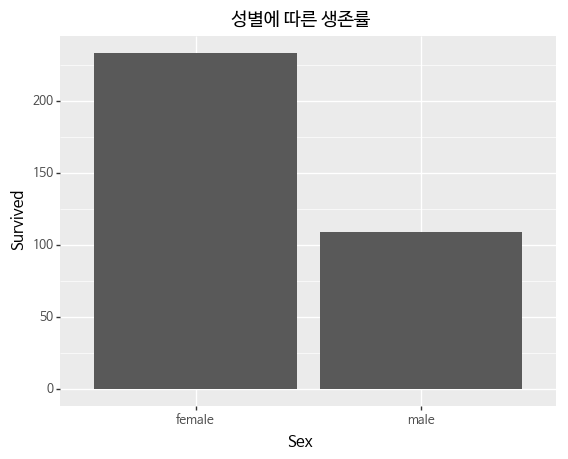

<ggplot: (115631891776)>

In [306]:
from plotnine import *
(ggplot(train) + 
 aes(x="Sex", y="Survived") + 
 geom_col() +
 ggtitle("성별에 따른 생존률") +
 theme(text=element_text(family="NanumBarunGothic")))

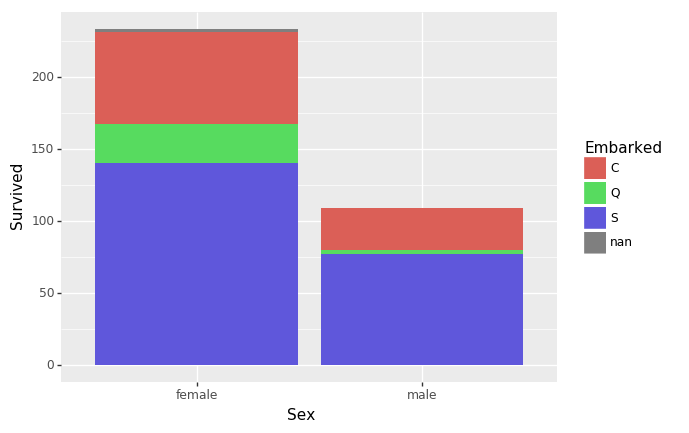

<ggplot: (115632152419)>

In [307]:
(ggplot(train) + 
 aes(x="Sex", y="Survived", fill="Embarked") +
 geom_col())

In [308]:
# Pclass별 데이터 건수
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [310]:
train["Pclass"] = train["Pclass"].astype(str)

In [311]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


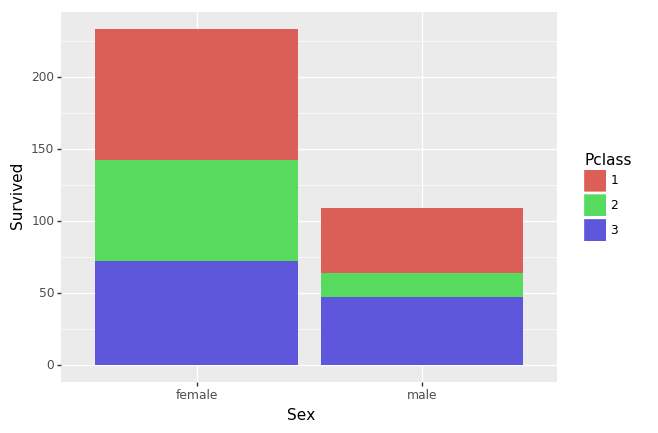

<ggplot: (115632549275)>

In [312]:
(ggplot(train) + 
 aes(x="Sex", y="Survived", fill="Pclass") +
 geom_col())

In [313]:
train_drop_age = train["Age"].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


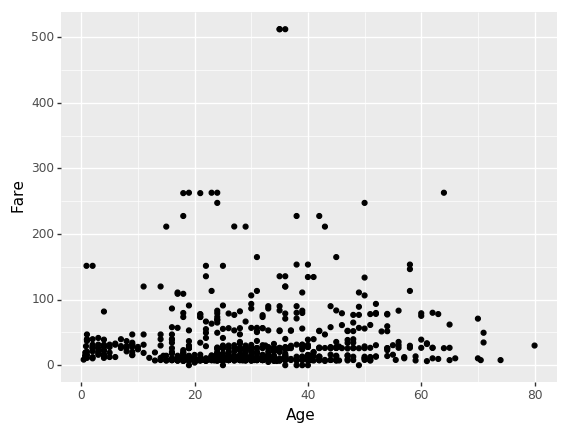

<ggplot: (115632622123)>

In [314]:
(ggplot(train) +
 aes(x="Age", y="Fare") +
 geom_point())

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


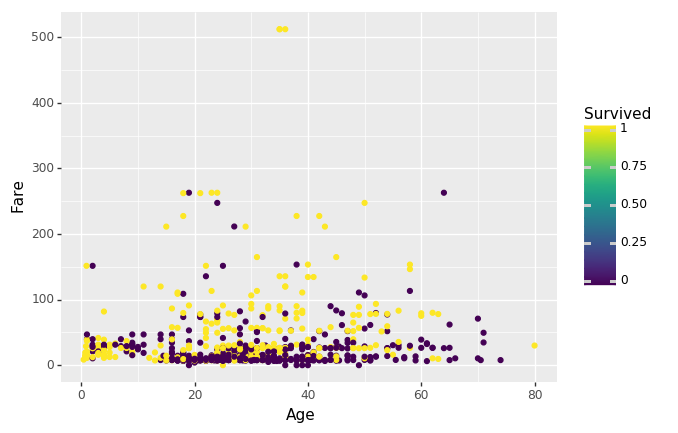

<ggplot: (-9223371921222149537)>

In [315]:
# 연령대와 운임 생존율 
(ggplot(train) +
 aes(x="Age", y="Fare", color="Survived") +
 geom_point())

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


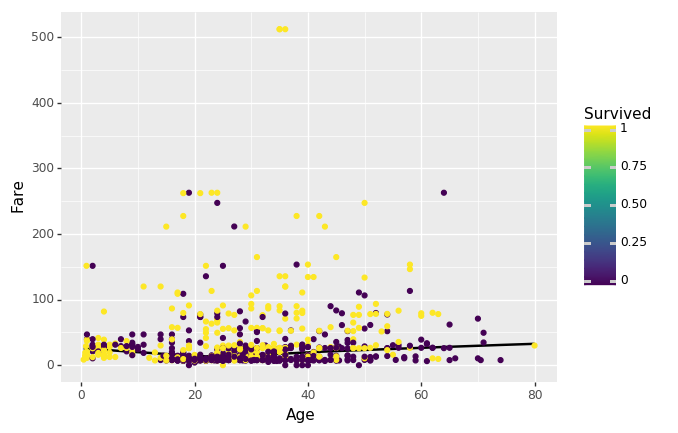

<ggplot: (115632626212)>

In [316]:
(ggplot(train) +
 aes(x="Age", y="Fare", color="Survived") +
 stat_smooth() + 
 geom_point())

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


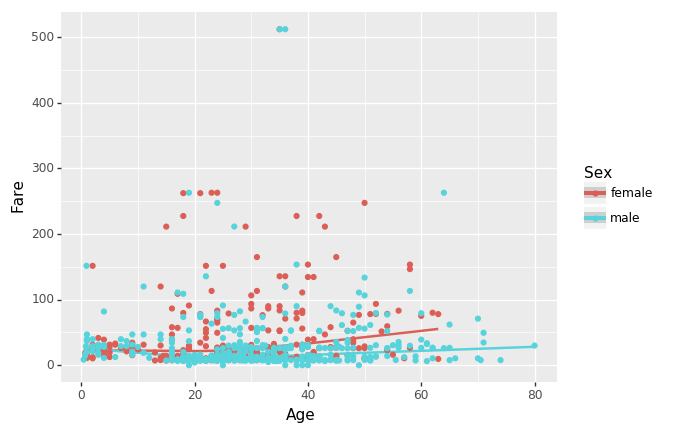

<ggplot: (-9223371921222621401)>

In [317]:
(ggplot(train) +
 aes(x="Age", y="Fare", color="Sex") +
 stat_smooth() + 
 geom_point())

In [318]:
train.info()
# Sex            891 non-null object
# Survived       891 non-null int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


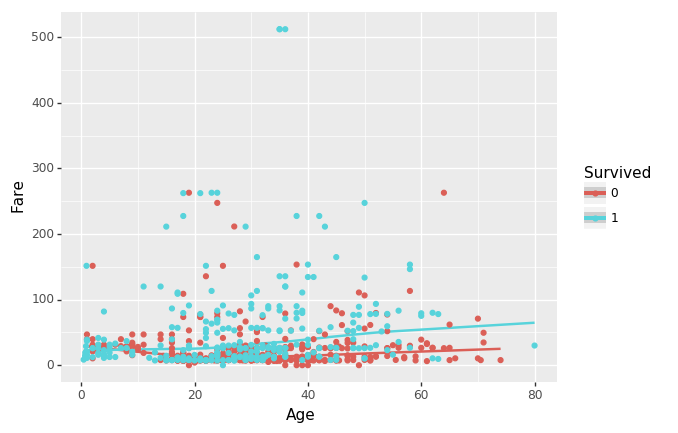

<ggplot: (-9223371921222038563)>

In [319]:
train["Survived"] = train["Survived"].astype("category")
(ggplot(train) +
 aes(x="Age", y="Fare", color="Survived") +
 stat_smooth() + 
 geom_point())
# 나이가 많아지면 운임을 많이 내고 살 확률이 높아지는 경향이 있다

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


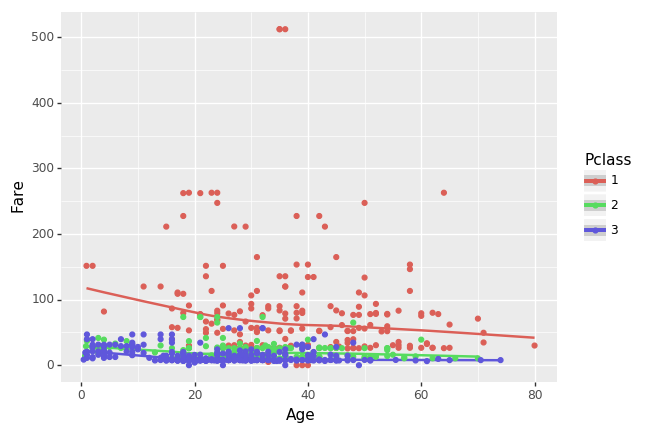

<ggplot: (115632919528)>

In [320]:
(ggplot(train) +
 aes(x="Age", y="Fare", color="Pclass") +
 stat_smooth() + 
 geom_point())

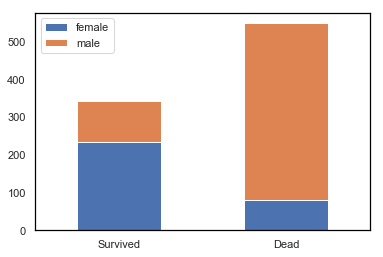

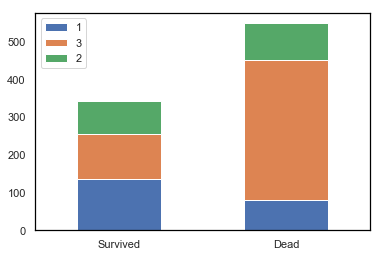

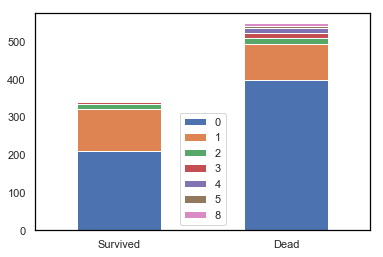

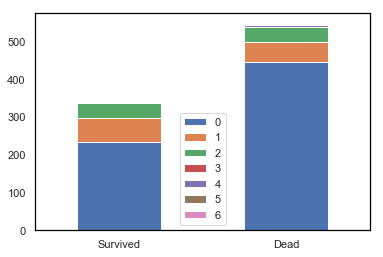

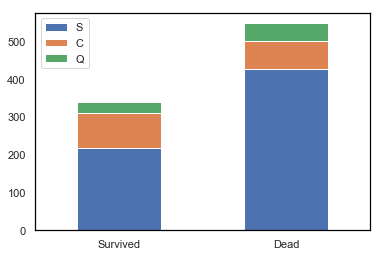

In [321]:
def bar_chart(f):
    survived = train[train["Survived"] == 1][f].value_counts() # 생존자 중 선택한 f 열(속성)의 수
    dead = train[train["Survived"] == 0][f].value_counts() # 사망자 중 선택한 f 열(속성)의 수
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    # df.plot.bar(rot=0, stacked=False, figsize=(6, 4))
    df.plot.bar(rot=0, stacked=True, figsize=(6, 4))

bar_chart("Sex") # 성별에 따른 생존자 수를 막대 그래프로 시각화
bar_chart("Pclass")
bar_chart("SibSp")
bar_chart("Parch")
bar_chart("Embarked")

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


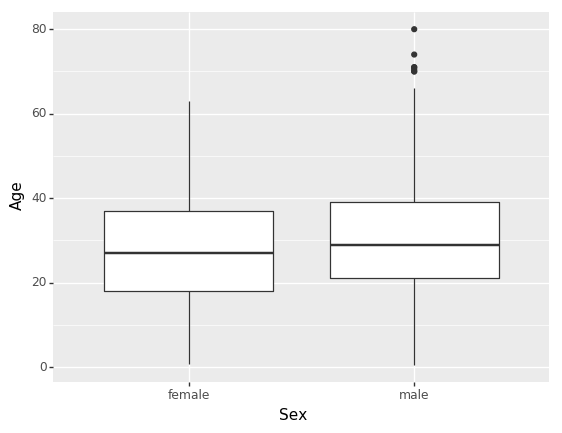

<ggplot: (115632919048)>

In [322]:
(ggplot(train) + 
 aes(x="Sex", y="Age") +
 geom_boxplot()) # Removed 177 rows containing non-finite values.

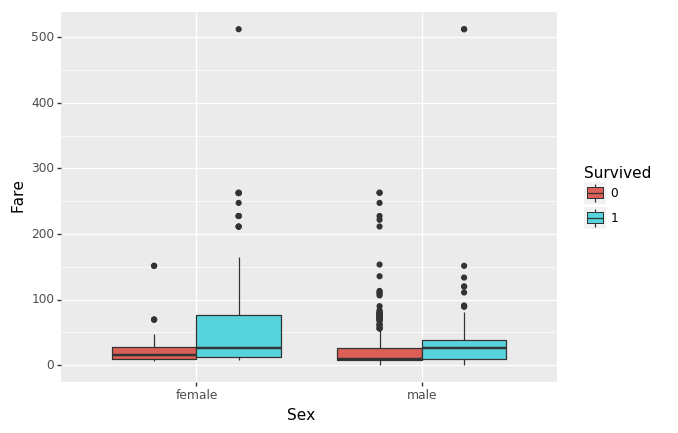

<ggplot: (-9223371921220206518)>

In [323]:
(ggplot(train) + 
 aes(x="Sex", y="Fare", fill="Survived") +
 geom_boxplot())

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


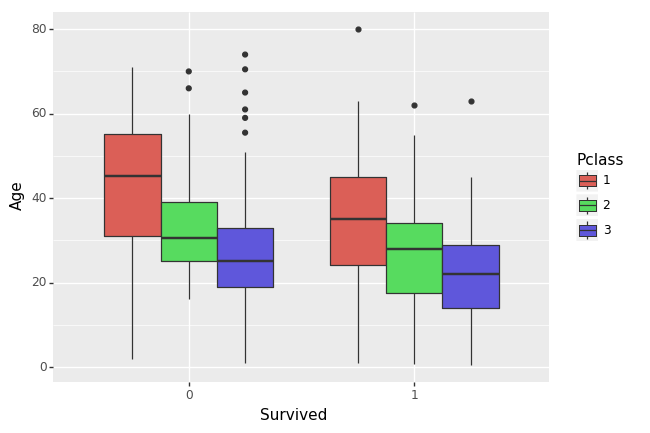

<ggplot: (-9223371921220156342)>

In [324]:
(ggplot(train) + 
 aes(x="Survived", y="Age", fill="Pclass") +
 geom_boxplot()) # Removed 177 rows containing non-finite values. 결측치 처리가 필요

In [325]:
train["Age_median"] = train["Age"]
train["Age_mean"] = train["Age"]
train["Age_mode"] = train["Age"] 

train["Age_median"] = train["Age_median"].fillna(train["Age_median"].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       714 non-null float64
Age_mode       714 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


In [326]:
train["Age_mean"].fillna(train["Age_mean"].mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       714 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


In [327]:
train["Age_mode"].mode() # 최빈수 

0    24.0
dtype: float64

In [328]:
type(train["Age_mode"].mode()) 

pandas.core.series.Series

In [329]:
# train["Age_mode"].fillna(train["Age_mode"].mode()) # 버전에 따른 error 
train["Age_mode"].fillna(train["Age_mode"].mode()[0], inplace=True) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_bin : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


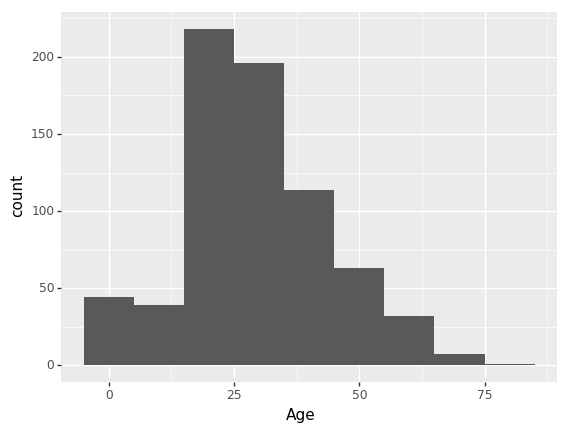

<ggplot: (-9223371921220209008)>

In [330]:
# 연령대 분포
(ggplot(train) + 
 aes(x="Age") +
 geom_histogram(binwidth=10)) # Removed 177 rows containing non-finite values.

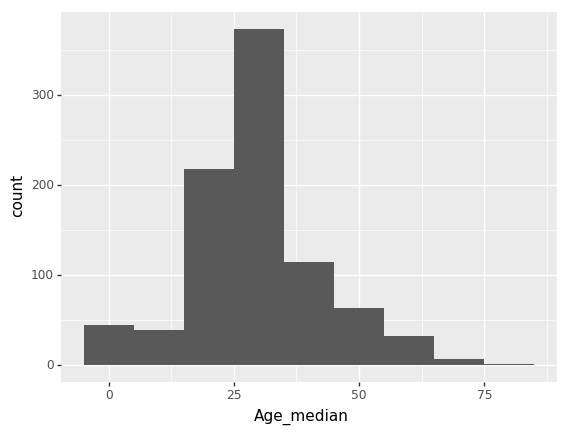

<ggplot: (-9223371921221250535)>

In [331]:
# 결측치를 중앙값으로 대체한 연령대 분포
(ggplot(train) + 
 aes(x="Age_median") +
 geom_histogram(binwidth=10)) 

In [383]:
train_test_data = [train, test]
train_test_data

[     PassengerId Survived Pclass  \
 0              1        0      3   
 1              2        1      1   
 2              3        1      3   
 3              4        1      1   
 4              5        0      3   
 5              6        0      3   
 6              7        0      1   
 7              8        0      3   
 8              9        1      3   
 9             10        1      2   
 10            11        1      3   
 11            12        1      1   
 12            13        0      3   
 13            14        0      3   
 14            15        0      3   
 15            16        1      2   
 16            17        0      3   
 17            18        1      2   
 18            19        0      3   
 19            20        1      3   
 20            21        0      2   
 21            22        1      2   
 22            23        1      3   
 23            24        1      1   
 24            25        0      3   
 25            26        1      3   
 

In [384]:
# 정규 표현식 사용 → 호칭 추출 → 호칭별 건수 출력
for idx, data in enumerate(train_test_data): # 2번 반복, 반복할 때 마다 DF를 읽음
    tmp = {"Title" : []}
    for name in data["Name"]:
        res = re.findall("([\w]+)[.]\s", name)
        tmp["Title"].append(res[0])
    train_test_data[idx] = pd.concat([data, pd.DataFrame(tmp)], axis=1)

In [385]:
train_test_data[0][["Name", "Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [386]:
train_test_data[1][["Name", "Title"]].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [396]:
# Mr=0, Miss=1, Mrs=2, 나머지는 모두 3 후 별도의 컬럼 추가
titleDict = {"Mr": 0, "Miss":1, "Mrs":2}
for idx, data in enumerate(train_test_data): 
    titleCode = {"Code": []}
    for title in data["Title"]:
        if title in titleDict.keys():
            titleCode["Code"].append(titleDict[title])
        else:
            titleCode["Code"].append(3)
    train_test_data[idx] = pd.concat([data, pd.DataFrame(titleCode)], axis=1) 

In [399]:
train_test_data[0][["Title", "Code"]].head(10)

,Title,Code
0,Mr,0
1,Mrs,2
2,Miss,1
3,Mrs,2
4,Mr,0
5,Mr,0
6,Mr,0
7,Master,3
8,Mrs,2
9,Mrs,2


In [400]:
train_test_data[1][["Title", "Code"]].head(10)

,Title,Code
0,Mr,0
1,Mrs,2
2,Mr,0
3,Mr,0
4,Mrs,2
5,Mr,0
6,Miss,1
7,Mr,0
8,Mrs,2
9,Mr,0
